### Brute Force search


- In this method, we check all the pieces until we find the right one. Compare each pixel one image to each pixel in other image to find the matching feature.

- Time consuming when image is large.

In [1]:
import cv2
import numpy as np

In [2]:
sift= cv2.SIFT_create()
sift

< cv2.SIFT 0x7a5270fcce10>

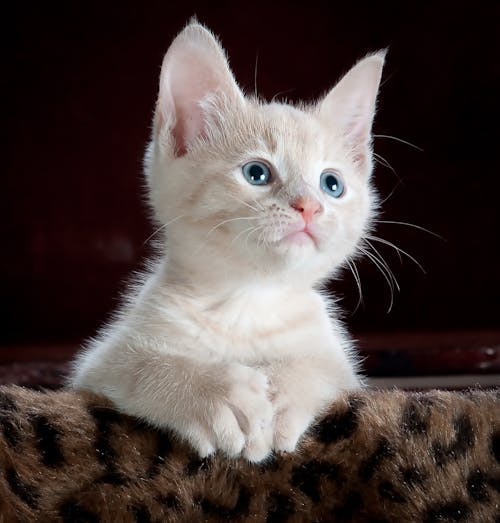

In [3]:
from google.colab.patches import cv2_imshow

img1= cv2.imread('img1.jpeg')
img2= cv2.imread('img2.png')
cv2_imshow(img1)

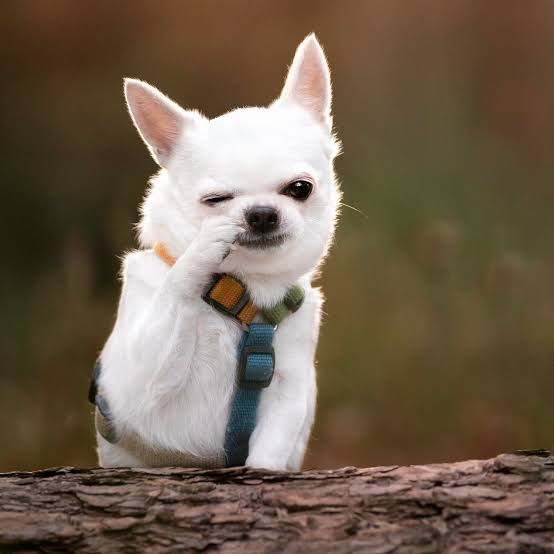

In [4]:
cv2_imshow(img2)

### Find the keypoints and descriptors with SIFT.

In [5]:
kp1, des1= sift.detectAndCompute(img1, None)
kp2, des2= sift.detectAndCompute(img2, None)

In [6]:
kp1[0:10], des1

((< cv2.KeyPoint 0x7a52accf0030>,
  < cv2.KeyPoint 0x7a52accf0390>,
  < cv2.KeyPoint 0x7a529fe9fc90>,
  < cv2.KeyPoint 0x7a529fe9ec40>,
  < cv2.KeyPoint 0x7a529fedd3e0>,
  < cv2.KeyPoint 0x7a52710034b0>,
  < cv2.KeyPoint 0x7a5271003a80>,
  < cv2.KeyPoint 0x7a5271002eb0>,
  < cv2.KeyPoint 0x7a5271061b90>,
  < cv2.KeyPoint 0x7a5271061ec0>),
 array([[19.,  4., 17., ...,  4.,  7., 92.],
        [27., 15.,  1., ...,  4.,  0.,  2.],
        [ 0.,  0.,  0., ...,  0.,  0.,  1.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  1., 23.],
        [24.,  1.,  0., ..., 28.,  7., 30.],
        [ 5.,  0.,  0., ..., 12., 10., 13.]], dtype=float32))

In [7]:
len(kp1), len(des1), len(kp2), len(des2)

(640, 640, 1121, 1121)

### Finding matches using k nearest neighbors

## Alternatives to `knnMatch()`

1. **`match()`**: Returns the best match for each descriptor in the first image to a descriptor in the second image. It does not return multiple matches per descriptor.

```python
matches = bf.match(des1, des2)
```

2. **`radiusMatch()`**: Returns all matches for each descriptor in the first image which have a distance less than the specified radius. The returned matches are not guaranteed to be in any particular order.

```python
matches = bf.radiusMatch(des1, des2, maxDistance=50.0)
```

## How `BFMatcher` works

`BFMatcher` (Brute-Force Matcher) is a simple matcher that compares each descriptor from the first image with every descriptor from the second image using a distance measure (e.g., Hamming distance for binary descriptors like ORB, Euclidean distance for real-valued descriptors like SIFT and SURF). It returns the matches with the smallest distance.

The `knnMatch()` method of `BFMatcher` finds the k nearest neighbors for each descriptor in the first image. It returns a list of lists, where each sublist contains the k best matches for a descriptor.

In [8]:
bf= cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

### Apply ratio test to threshold the best matches.

In [9]:
good=[]

for m, n in matches:
  if m.distance<0.75*n.distance:
    good.append([m])

In [10]:
img3 = cv2.drawMatchesKnn(
    img1, kp1, img2, kp2, good, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

In [11]:
img1.shape, img2.shape

((523, 500, 3), (554, 554, 3))

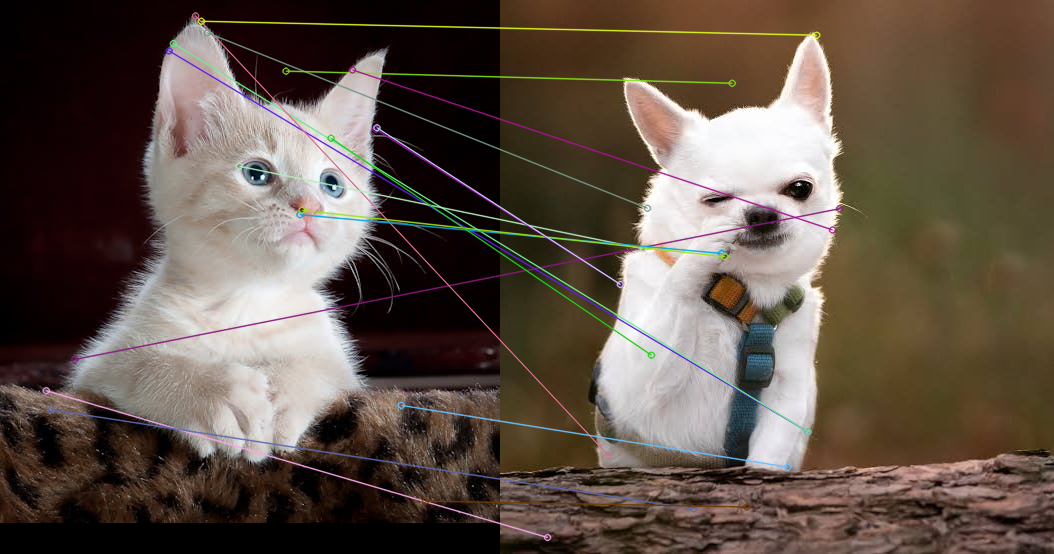

In [12]:
cv2_imshow(img3)

### Brute Force with ORB (binary) descriptors

creates an instance of the ORB detector and descriptor extractor.

In [13]:
orb= cv2.ORB_create()

- kp1 stands for "keypoints 1". It will store the detected keypoints in the first image (img1). The keypoints represent interesting points in the image, such as corners, blobs, or areas with high contrast.

- des1 stands for "descriptors 1". It will store the descriptors computed for each keypoint in kp1. Descriptors are numerical representations of the local neighborhood around each keypoint. They are used for matching keypoints between images.

1. `orb.detectAndCompute(img1, None)` is a method call that performs two tasks:
  - It detects keypoints in the image img1 using the ORB algorithm.
  - It computes descriptors for each detected keypoint using the ORB descriptor extractor.

The None argument in the method call is a mask. In this case, it is not used, so it is set to None.

In [28]:
kp1, des1= orb.detectAndCompute(img1, None)
kp2, des2= orb.detectAndCompute(img2, None)

In [14]:
kp1[0], des1[0]

(< cv2.KeyPoint 0x7a52accf0030>,
 array([ 19.,   4.,  17.,  14.,   2.,   2.,  20.,  71.,  26.,   9.,  22.,
         25.,  18.,  45.,  32.,  40., 132.,  18.,   3.,   4.,   2.,   5.,
          6., 113.,  48.,   5.,   4.,  57.,  38.,   4.,   9.,  61.,   9.,
          6.,  39.,  53.,  19.,   5.,   4.,  16.,  44.,  46., 113.,  67.,
         10.,   2.,   5.,  14., 132.,  73.,  14.,  28.,  12.,   0.,   1.,
         45.,  48.,  34.,  17., 107.,  45.,   1.,   2.,   8.,   1.,   0.,
          2.,  16.,  74.,  58.,  16.,   7.,  51.,   7.,  12.,  13.,  13.,
         15.,  71., 132., 132.,  14.,   3.,  50.,  59.,   3.,  11., 132.,
         29.,  21.,  15.,  97.,  76.,   4.,   4.,  48.,   5.,   0.,   0.,
          1.,  46.,  17.,   5.,  10.,  62.,   2.,   0.,   1.,   1.,   3.,
         10., 110.,  50.,   6.,   7.,  57.,  49.,   2.,   3.,  59.,  11.,
          0.,   0.,  27.,  53.,   4.,   7.,  92.], dtype=float32))

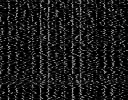

In [18]:
cv2_imshow(des1[0:100])

In [25]:
# Convert the descriptor arrays to the required data type (CV_32F)
des1 = des1.astype('float32')
des2 = des2.astype('float32')

# Check the data type of the descriptor arrays
print(des1.dtype)
print(des2.dtype)

float32
float32


In [29]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)

In [35]:
matches[:5]

((< cv2.DMatch 0x7a525fea2af0>, < cv2.DMatch 0x7a525fea3070>),
 (< cv2.DMatch 0x7a525fea3750>, < cv2.DMatch 0x7a525fea3270>),
 (< cv2.DMatch 0x7a525fea2ad0>, < cv2.DMatch 0x7a525fea3610>),
 (< cv2.DMatch 0x7a525fea2830>, < cv2.DMatch 0x7a525fea2a90>),
 (< cv2.DMatch 0x7a525fea2130>, < cv2.DMatch 0x7a525fea37d0>))

In [36]:
img3 = cv2.drawMatches(
    img1,
    kp1,
    img2,
    kp2,
    matches[:n],
    None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS,
)

In [ ]:
cv2_imshow(img3)